In [1]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet

C:\Users\Gaurav\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


PIL image size (224, 224)


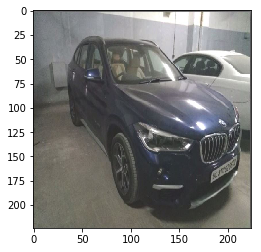

In [60]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
 
filename = "C:/Users/Gaurav/Gaurav's Files/Study/Data Science/ISB Business Analytics/CBA10/Classes/Capstone/Model/Test/Car5.jpg"
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

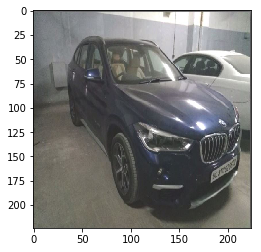

numpy array size (224, 224, 3)


In [61]:
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

image batch size (1, 224, 224, 3)


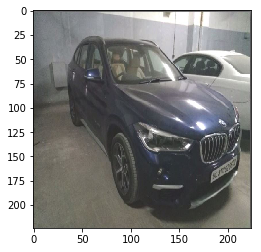

In [62]:
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

VGG 16 Network

In [63]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label_vgg = decode_predictions(predictions)
label_vgg

[[('n03930630', 'pickup', 0.28008217),
  ('n03459775', 'grille', 0.1887429),
  ('n04285008', 'sports_car', 0.13435106),
  ('n02930766', 'cab', 0.08302174),
  ('n02974003', 'car_wheel', 0.053374745)]]

Resnet50 Network

In [64]:
# prepare the image for the ResNet50 model
processed_image = resnet50.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = resnet_model.predict(processed_image)

# convert the probabilities to class labels
# If you want to see the top 3 predictions, specify it using the top argument
label_resnet = decode_predictions(predictions, top=3)
label_resnet

[[('n04285008', 'sports_car', 0.23266205),
  ('n03459775', 'grille', 0.16204925),
  ('n03930630', 'pickup', 0.14146256)]]

MobileNet Network

In [65]:
# prepare the image for the MobileNet model
processed_image = mobilenet.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = mobilenet_model.predict(processed_image)

# convert the probabilities to imagenet class labels
label_mobilenet = decode_predictions(predictions)
label_mobilenet

[[('n04285008', 'sports_car', 0.2852907),
  ('n03670208', 'limousine', 0.26352608),
  ('n02974003', 'car_wheel', 0.2477781),
  ('n02814533', 'beach_wagon', 0.067027844),
  ('n03100240', 'convertible', 0.037702158)]]

Inception_V3 Network

In [66]:
# load an image in PIL format
original = load_img(filename, target_size=(299, 299))

# Convert the PIL image into numpy array
numpy_image = img_to_array(original)

# reshape data in terms of batchsize
image_batch = np.expand_dims(numpy_image, axis=0)

# prepare the image for the Inception model
processed_image = inception_v3.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)

# convert the probabilities to class labels
label_inception = decode_predictions(predictions)
label_inception

[[('n03459775', 'grille', 0.27732),
  ('n02974003', 'car_wheel', 0.24622013),
  ('n04285008', 'sports_car', 0.19178341),
  ('n04037443', 'racer', 0.06053925),
  ('n03100240', 'convertible', 0.05492591)]]

In [67]:
import cv2
numpy_image = np.uint8(img_to_array(original)).copy()
numpy_image = cv2.resize(numpy_image,(900,900))

cv2.putText(numpy_image, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]) , (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
numpy_image = cv2.resize(numpy_image, (700,700))
cv2.imwrite("images/{}_output.jpg".format(filename.split('/')[-1].split('.')[0]),cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR))

False

(-0.5, 699.5, 699.5, -0.5)

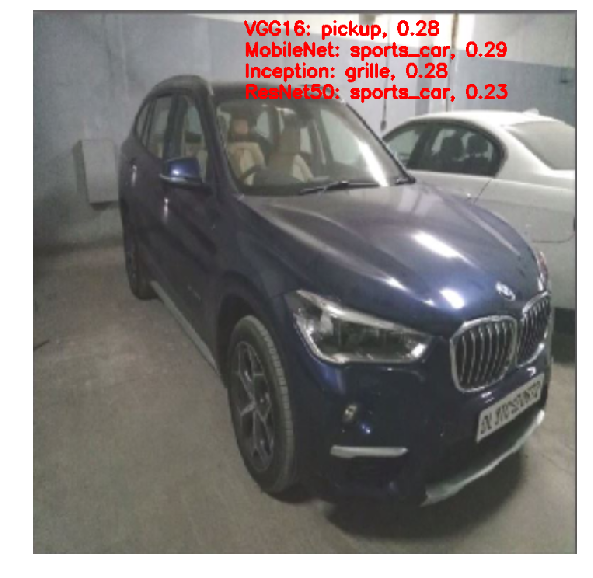

In [68]:
plt.figure(figsize=[10,10])
plt.imshow(numpy_image)
plt.axis('off')